In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Homework 4: Data Analysis

## References

* [Chapter 8 - Functions and Tables](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html#) 
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-fa23/resources/quick_reference.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.
- Unless you are asked otherwise, use the non-interactive visualizations when asked to produce a visualization for a task.
- View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.

Run the following code cell to import the tools for this assignment.

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 🌉 San Francisco City and County Employee Salaries

In this homework assignment, you will combine several of the skills and concepts you've learned so far to analyze [Employee Compensation](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd) data provided by the SF Controller's Office. We have filtered it to retain just the relevant columns and restricted the data to the fiscal year 2022-2023 (July 1, 2022 - June 30, 2023). 

The data stored on your account was pulled from [Employee Compensation page](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd) at `DataSF.gov` using the API endpoint: 

`'https://data.sfgov.org/resource/88g8-5mnd.csv?$limit=1000000&year_type=Fiscal&year=2023'`

Run the following cell to load that data into a table called `sf`.

In [3]:
# API endpoint: https://data.sfgov.org/resource/88g8-5mnd.csv?$limit=1000000&year_type=Fiscal&year=2023
sf = Table.read_table('sf_fy22_23.csv')
sf

organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,job_family,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation
4,2800,2846,Fiscal,2023,Community Health,DPH,Public Health,21,"Prof & Tech Eng, Local 21",Public Health,Nutritionist,52846918,68586.6,0,18226.5,86813.1,12782.7,9007.39,6819.16,28609.2,115422
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,50859893,147886,2584.28,12881.8,163352,23099.1,16134.5,10227.7,49461.3,212813
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,47356818,0,142.79,0,142.79,0,0,10.95,10.95,153.74
4,2600,2654,Fiscal,2023,Community Health,DPH,Public Health,250,"SEIU, Local 1021, Misc",Dietary & Food,Cook,50850238,86243.6,33036.1,3166.81,122446,16188.5,16796.1,9672.34,42657,165103
4,2300,2322,Fiscal,2023,Community Health,DPH,Public Health,858,"Teamsters, Local 856, Spv RN",Nursing,Nurse Manager,50877316,247150,1140.71,2560,250850,44327.7,20737.9,13821,78886.6,329737
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,52066865,74860.1,16860.9,13643.7,105365,9115.42,8218.37,1798.2,19132,124497
4,2300,2320,Fiscal,2023,Community Health,DPH,Public Health,791,"SEIU, Local 1021, RN",Nursing,Registered Nurse,50850113,192213,19817.7,26600.3,238631,27330.6,21596,10953.1,59879.8,298511
2,1200,1246,Fiscal,2023,"Public Works, Transportation & Commerce",DBI,Building Inspection,22,"Prof & Tech Eng, Local 21",Personnel,Prin Human Resources Analyst,54256822,151894,0,0,151894,27058.7,0,12029.7,39088.4,190983
1,8200,8239,Fiscal,2023,Public Protection,DEM,Dept of Emergency Management,790,"SEIU, Local 1021, Misc",Protection & Apprehension,Public SafetyComm Supv,50847867,137352,40134.6,5846.1,183332,26232,16683.1,13126.7,56041.8,239374
1,8200,8239,Fiscal,2023,Public Protection,DEM,Dept of Emergency Management,790,"SEIU, Local 1021, Misc",Protection & Apprehension,Public SafetyComm Supv,50870881,72843.4,2037.07,2311.37,77191.9,13826.2,9196.86,6065.27,29088.3,106280


### 📝 Data Notes

* Each line represents an employee's job information such as job family, salary, and benefits.
* The San Francisco Controller's Office  provides [a PDF explaining what each variable means](https://data.sfgov.org/api/views/88g8-5mnd/files/OMBVvreoXRjXG6oP4Ts4497dNxt14XlBqB6uIL6cq-o?download=True&filename=N:\EIS\DataCoordination\Metadata%20Spring%20Cleaning\CON_DataDictionary_Employee-Compensation.pdf).
There are a few interesting details in the data set that are explained in the [Employee Compensation FAQ](https://support.datasf.org/help/employee-compensation-faq)
    * Employees have been given an employee identifier for this data and is not connected to their actual employee identification.
    * An employee can appear on multiple lines
    * Rows may have zero dollar amounts
    * Adjustments to employee's pay can result in negative dollar amounts

### 🔔 Table Size Warning

This table has over 40 thousand rows in it. Just loading the data takes up more memory than most of our data sets so far. This means that you want to be careful with creating too many copies of the table since you have a limited amount of memory. We've set up the assignment, so you can complete the tasks with the provided amount of memory, but you may accidentally crash the kernel by running out of memory.

**If your kernel keeps crashing because of running out of memory:**
* Make sure you are only running this notebook and all your other kernels are shut down.
* Talk with a staff member about things you might be doing that utilize a lot of resources.

### Task 01 📍

The [Employee Compensation FAQ](https://support.datasf.org/help/employee-compensation-faq) states:
> One employee can appear on multiple lines per year if they changed positions and/or departments mid-year, which happens with some frequency.

This may or may not be true for this particular fiscal year. There are 41,295 rows in the `sf` table. Determine how many unique employee identifiers there are in the `sf` table to see if there are any employees listed more than once. Assign `num_employee_ids` to the number (`int`) of unique employee identifiers in the `sf` table.

*Hint: Consider using the `group` table method.*

_Points:_ 2

In [4]:
num_employee_ids = len(sf.group('employee_identifier').sort('count', False).column('employee_identifier'))
num_employee_ids

41295

In [5]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ num_employee_ids represents an integer.

### Task 02 📍🔎

<!-- BEGIN QUESTION -->

There are a few departments that have a large number of employees. For this task, produce a bar chart that shows the five largest departments in the `sf` table ranked by employee count.

_Points:_ 2

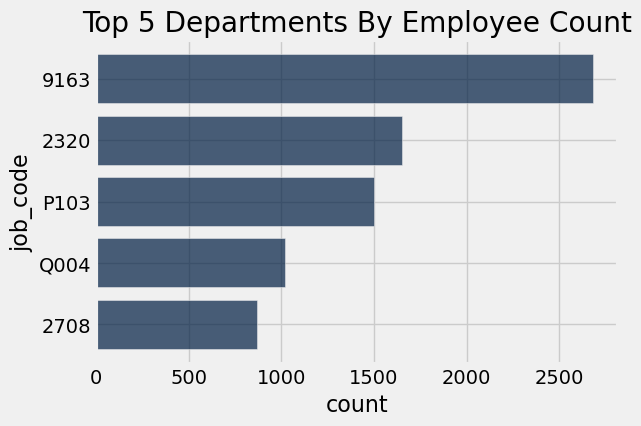

In [6]:
job_and_employee = sf.select('job_code', 'employee_identifier')
job_distribution = job_and_employee.group('job_code')
job_distribution.sort('count', True).take(np.arange(5)).barh('job_code')

# Leave this to provide a title for your visualization
plt.title('Top 5 Departments By Employee Count')
plt.show()

<!-- END QUESTION -->

### Task 03 📍

Some employees for the city and county make a lot of money. Identify the job title that makes the most in terms of total compensation (the sum of salary and benefits).
1. Assign the largest total compensation (a `float` value) to `max_compensation`.
2. Assign the job title (a `str` value) associated with the highest total compensation to the name `max_compensation_position`.

_Points:_ 4

In [7]:
max_compensation = sf.sort('total_compensation', True).column('total_compensation').item(0)
max_compensation_position = sf.sort('total_compensation', True).column('job').item(0)
print(f"The largest total compensation is ${max_compensation:,}")
print(f"The position associated with this compensation is: {max_compensation_position}") 

The largest total compensation is $807,199.97
The position associated with this compensation is: Chf Executive & Investment Ofc


In [8]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ max_compensation represents a float.
task_03 - 2 message: ✅ max_compensation_position represents a string.

### Task 04 📍🔎

<!-- BEGIN QUESTION -->

Next, summarize the distribution of total compensation values so you can compare that large salary with the salaries of the rest of the employees. Specifically, create a histogram showing the distribution of total compensation.
* Use the `unit = '$'` argument
* Use the default bins.

_Points:_ 2

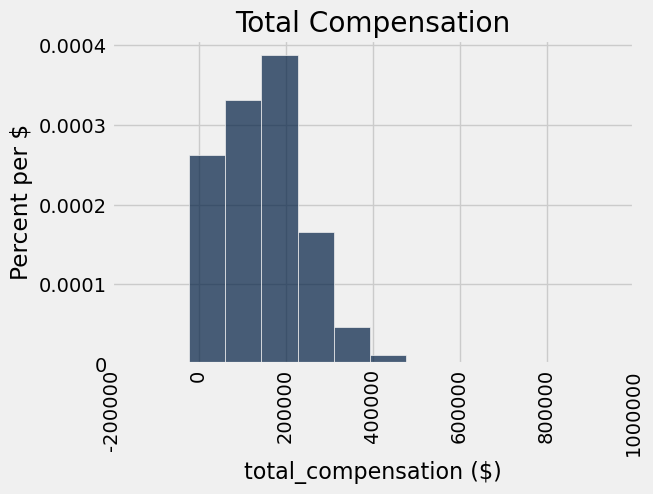

In [9]:
sf.hist('total_compensation', unit = '$')

# Leave this to provide a title for your visualization
plt.title('Total Compensation')
plt.show()

<!-- END QUESTION -->

### Task 05 📍🔎

<!-- BEGIN QUESTION -->

In the provided Markdown cell, explain why there seems to be no information visualized on the right side of the histogram created in Task 04. Make sure you connect your response to the `max_compensation` value you calculated.

_Points:_ 2

The frequency density is lower for the remaining values over 400000 and 800000 thousands.

<!-- END QUESTION -->

### Task 06 📍🔎

<!-- BEGIN QUESTION -->

The area of a bar in a histogram reflects the percentage of the data represented in that particular bin. To have you think more deeply about this, we want you to create a strange version of the histogram you just made.

1. Create an array called `equal_split_bins` that can be used to form the bins for a histogram of total compensation that splits the data into two equal bins.
    * _Hint: The median (`np.median`) of a collection of numbers can be used to split the numbers into two equal halves._
    * _Hint: Don't forget that you named the largest total compensation as `max_compensation` in a previous task._
2. Create a histogram for the total compensation values by using `equal_split_bins` such that your histogram only shows 2 bins (bars).
    * _Hint: Use the `bins` argument for `hist` to incorporate the `equal_split_bins` array._

As with Task 02, we are just scoring your visualization, so you are welcome to alter the template/steps.

_Points:_ 2

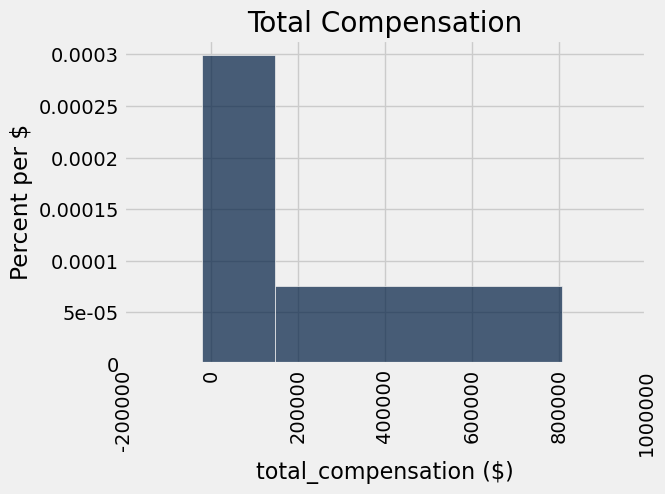

In [10]:
# Step 1
min_compensation = np.min(sf.column('total_compensation'))
median_compensation = np.median(sf.column('total_compensation'))
equal_split_bins = [min_compensation, median_compensation, max_compensation]

# Step 2
sf.hist('total_compensation', bins = equal_split_bins, unit = '$')

# Leave this to provide a title for your visualization
plt.title('Total Compensation')
plt.show()

<!-- END QUESTION -->

Now, that you have a basic feel for the distribution of total compensation values. Summarize the total compensations based on department. Salaries may vary within a department depending on several factors such as job, experience, etc. There might be extremely high or low salaries within a department, so it is best to use a summary value like the median which is less influenced by extreme values. 

### Task 07 📍

Your goal for this task is to create a table titled `top_5_departments` featuring two columns: `department` listing department names and `total_compensation median` displaying the median total compensation for each department. Once done, the final table should showcase the 5 departments in the data set with the highest median total compensation values.

_Points:_ 5

In [11]:
medians = []
departments = sf.group('department', sum).column('department')
for department in departments:
    department_median = np.median(sf.where('department', are.equal_to(department)).column('total_compensation'))
    medians.append(department_median)
top_5_departments = Table().with_columns('department', departments, 'total_compensation_median', medians)
top_5_departments = top_5_departments.sort('total_compensation_median', True).take(np.arange(5))
top_5_departments

department,total_compensation_median
Law Library,258800
Fire Department,235598
Sheriff,230050
City Attorney,227537
Police,225890


In [12]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ top_5_departments is a Table.
task_07 - 2 message: ✅ top_5_departments has the correct number of rows and columns

### Task 08 📍

Set `department_ranges` to a table containing departments as the rows, and the organization groups as the columns. The values in the rows should correspond to a total compensation range, where the range is defined as the **difference between the highest total compensation and the lowest total compensation in the department for that organization group**.

Keep in mind the following while working on this:

* First you'll need to define a new function `compensation_range` which takes in an array of compensations and returns the range of compensations in that array.
* What table function allows you to specify the rows and columns of a new table?


_Points:_ 4

In [13]:
# Define compensation_range first
def compensation_range(money_money): 
    return np.max(money_money) - np.min(money_money) 

department_ranges = sf.pivot('organization_group', 'department', 'total_compensation', collect = compensation_range)
department_ranges

department,Community Health,Culture & Recreation,General Administration & Finance,Human Welfare & Neighborhood Development,Public Protection,"Public Works, Transportation & Commerce"
Academy Of Sciences,0,177132,0,0,0,0
Administrative Services,0,0,513149,0,0,0
Adult Probation,0,0,0,0,445079,0
Airport Commission,0,0,0,0,0,506447
Art Commission,0,291648,0,0,0,0
Asian Art Museum,0,338984,0,0,0,0
Assessor,0,0,320890,0,0,0
Board Of Appeals,0,0,0,0,0,278601
Board Of Supervisors,0,0,334616,0,0,0
Building Inspection,0,0,0,0,0,368399


In [14]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ Your function compensation_range seems to be working correctly.
task_08 - 2 message: ✅ You have the correct column labels in department_ranges.
task_08 - 3 message: ✅ The values in one of the columns of department_ranges seem correct.

### Task 09 📍🔎

<!-- BEGIN QUESTION -->

Provide at least **two** different explanations as to why some of the row values are `0` in the `department_ranges` table from the previous question.


_Points:_ 2

The zero is place in the tab;e from the previous question because the combination doesn't show off, as the rows in the original table doesn't match. So we can infer from the previous table that the Art Commission group doesn't have public protection. 

<!-- END QUESTION -->

Which department has the longest job title? There are a few ways you might answer this, but we are going to guide you in one way that gives you practice making and using functions with the `group` method. 

Before you go on to the next task, run the following code cell to define a function that takes a list or array of strings and returns an array of the lengths of those strings. You don't have to understand how the code works, but this might give you an idea of where error messages come from. You should try it out with a few lists/arrays of strings to see what it is doing.

In [15]:
def string_lengths(strings):
    '''
    Returns an array that contains the length of each string in the array or list called strings.

    Example
    --------
    >>> string_lengths(['a', 'an', 'the'])
    array([1, 2, 3])
    '''
    
    if not isinstance(strings, (list, np.ndarray)):
        raise ValueError("Input must be a list or array")

    if len(strings) == 0:
        return np.array([0])
    
    for s in strings:
        if not isinstance(s, str):
            raise ValueError("Input must contain only strings")
        
    return np.array([len(s) for s in strings])

In [16]:
# Try calling the function
an_array_of_strings = make_array('City', 'College', 'of', 'San Francisco')
string_lengths(an_array_of_strings)

array([ 4,  7,  2, 13])

Notice that it provides the length of the 4 strings that were provided in the input array. Remember that `len` does count the blank space in `'San Francisco'`.

### Task 10 📍

Define a function called `max_job_name` that returns the length of the longest job name from an array or list of job names (strings).

* **Hint:** Use the `string_lengths` function above. 
* **Hint:** `max_job_name(['Electrician', 'Analyst', 'Social Worker'])` should return `13` because `'Social Worker'` is the longest string with 13 characters (including the space).
* **Hint:** You can assume the list of jobs is not empty because every department in the `sf` table has at least 1 job. 

_Points:_ 3

In [17]:
def max_job_name(names):
    return np.max(string_lengths(names))

# Try out the function
max_job_name(['Electrician', 'Analyst', 'Social Worker'])

13

In [18]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ max_job_name is callable.
task_10 - 2 message: ✅ max_job_name seems to be working.

### Task 11 📍

What are the lengths of the longest job names for each department?

Create a table called `departments` that shows a row for each unique department name in the `sf` table and the length of the longest job name within that department. A few things to consider when making your final table:

* Sort the table so that the department(s) with the longest job name are at the top of the table.
* The columns should be `'department'` and `'max_job_name_length'`.

**Hint:** Try out the `max_job_name` function you just made!

_Points:_ 2

In [19]:
departments = sf.select(
    'department', 'job').group(
    'department', max_job_name).sort(
    'job max_job_name', True)
departments = departments.relabel('job max_job_name', 'max_job_name_length')
departments

department,max_job_name_length
Administrative Services,30
Adult Probation,30
Airport Commission,30
Asian Art Museum,30
Assessor,30
Board Of Supervisors,30
Building Inspection,30
Child Support Services,30
City Attorney,30
City Planning,30


In [20]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ departments is a table (or department is a string).

---

California has laws in place to help govern how much an employee should be paid for overtime work. Visit the [Labor Commissioner's Office FAQ about Overtime](https://www.dir.ca.gov/dlse/faq_overtime.htm) if you are curious about these laws. There could be several reasons for why an employee works overtime. Some are healthy reasons and some are not. The ratio of overtime compensation to total compensation can provide a signal for health of departments and their employees. According to [Indeed.com](https://www.indeed.com/career-advice/career-development/working-overtime), here are some potential disadvantages of working extra hours:

> **Focus loss**: You will likely want to take breaks while working overtime, and you may lose focus and productivity naturally as your working hours increase. 
> 
> **Safety and health risk**: Working longer hours also can be dangerous, depending on the job. Working overtime regularly can also disrupt your work-life balance, lead to burnout or create health risks, such as sitting at a computer for long periods. Due to these risks, more companies are limiting the number of hours worked in certain positions, such as truck drivers. 
> 
> **Less work-life balance**: There are only 24 hours in the day, and working overtime reduces the time for a good work-life balance. More work hours mean fewer hours for family, relaxation and sleep.

On the other hand, here are some potential advantages for working extra hours:

> **Extra money**: Working overtime means you earn extra money for extra hours, usually 1.5 to two times your hourly rate. Overtime pay could allow you to bulk up your salary and have more money for living expenses, vacations or savings. 
>
>**Career boost**: Working overtime may also help advance your career—and potential earnings—by proving you’re reliable and motivated in your role. Volunteering to work extra hours shows your current employer that you’re dedicated to doing a good job. 
>
>**Gain experience**: Overtime is an opportunity to gain job experience and polish your skills. Typically, the more you work at something, the better you become.

One way to analyze overtime work for San Francisco employees is to consider the overtime pay values in the data set, but these values are relative to the amount of money the employee makes. To account for this you could consider overtime pay for an employee as a quantity relative to that employee's salary. This would allow you to compare these ratios for all the employees. Specifically, use the measurement called the overtime ratio defined as:

$$\text{Overtime Ratio} = \frac{\text{Overtime Pay}}{\text{Salary}}$$

There are many special cases when it comes to overtime pay that might analyzing this ratio in general challenging. So, to keep things more simple, narrow your focus to employees to at least a certain salary. Let that base salary reflect working 40 hrs per week for 52 weeks at the minimum wage of the time, 16.99 dollars per hour.

### Task 12 📍

For this task, create a table called `sf_above_35k` that contains the same information in the `sf` table and overtime ratios for employees making above $35,000. Make sure that `sf_above_35k` has:
 * Only employees from the `sf` table that have salaries above 35,000 dollars AND
 * The same columns as the `sf` table with an additional column `overtime_ratio` containing the overtime ratios from the above formula.

_Points:_ 5

In [21]:
sf_above_35k = sf.where('salaries', are.above(35_0000))

overtime_ratios = sf_above_35k.column('overtime') / sf_above_35k.column('salaries')

sf_above_35k = sf_above_35k.with_column('overtime_ratio', overtime_ratios).sort('overtime_ratio', True)
sf_above_35k

organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,job_family,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation,overtime_ratio
4,2200,2233,Fiscal,2023,Community Health,DPH,Public Health,163,"Physician/Dentists 11-AA, UAPD",Medical & Dental,Supervising Physician Spec,54056840,356380,5839.75,4867.5,367087,63220.7,15805.6,15924.5,94950.9,462038,0.0163863
4,2200,2242,Fiscal,2023,Community Health,DPH,Public Health,164,"Physician/Dentists 8-CC, UAPD",Medical & Dental,Sr Psychiatric Physician Spec,52816870,389632,5571.97,27422.5,422627,69421.4,20031.7,16776.8,106230,528857,0.0143006
4,2200,2242,Fiscal,2023,Community Health,DPH,Public Health,164,"Physician/Dentists 8-CC, UAPD",Medical & Dental,Sr Psychiatric Physician Spec,50855771,399885,2978.13,16308.8,419172,70973.2,20545.3,16626.2,108145,527317,0.00744746
4,2200,2242,Fiscal,2023,Community Health,DPH,Public Health,164,"Physician/Dentists 8-CC, UAPD",Medical & Dental,Sr Psychiatric Physician Spec,51726477,370979,1237.18,17132.5,389349,65951.4,20545.3,16205.5,102702,492051,0.0033349
4,2200,2243,Fiscal,2023,Community Health,DPH,Public Health,163,"Physician/Dentists 11-AA, UAPD",Medical & Dental,Sup Psychiatric Physician Spec,51806587,429602,1033.13,2685,433320,76540.5,15805.6,16908,109254,542574,0.00240485
4,2200,2242,Fiscal,2023,Community Health,DPH,Public Health,164,"Physician/Dentists 8-CC, UAPD",Medical & Dental,Sr Psychiatric Physician Spec,54296991,350248,749.4,18115,369112,62415.8,18510.5,15915.4,96841.7,465954,0.00213963
6,2500,2598,Fiscal,2023,General Administration & Finance,ADM,Administrative Services,164,"Physician/Dentists 8-CC, UAPD",Med Therapy & Auxiliary,Asst Med Examiner,50855775,368926,649.87,16707.8,386284,65461.5,20545.3,16139.2,102146,488430,0.00176152
4,2200,2232,Fiscal,2023,Community Health,DPH,Public Health,164,"Physician/Dentists 8-CC, UAPD",Medical & Dental,Senior Physician Specialist,53366848,374517,452,0,374969,66976.5,20505.8,16110.2,103592,478561,0.00120689
4,0900,0943,Fiscal,2023,Community Health,DPH,Public Health,351,"Municipal Exec Assoc, Misc",Management,Manager VIII,51196478,354780,0,4000,358780,63929.5,22476.4,16454.4,102860,461640,0
4,2200,2242,Fiscal,2023,Community Health,DPH,Public Health,164,"Physician/Dentists 8-CC, UAPD",Medical & Dental,Sr Psychiatric Physician Spec,53416924,370580,0,2560,373140,66003.6,20545.3,15939.7,102489,475629,0


In [22]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: ✅ sf_above_35k is a Table.
task_12 - 2 message: ✅ sf_above_35k has the correct number of columns.

### Task 13 📍🔎

<!-- BEGIN QUESTION -->

Is overtime collected similarly over the various salaries in the `sf_above_35k` table? See if there is any relationship between salary and the overtime ratios. For this task, create a visualization showing the relationship between salary and overtime ratio values for employees who make above $35,000.

_Points:_ 2

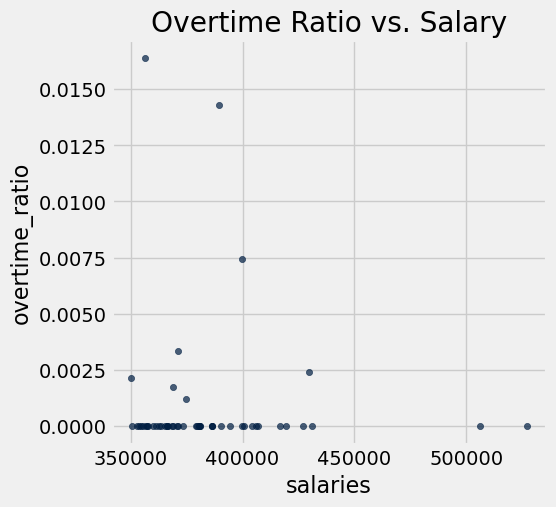

In [23]:
sf_above_35k.scatter('salaries', 'overtime_ratio')

# Leave this to provide a title for your visualization
plt.title('Overtime Ratio vs. Salary')
plt.show()

<!-- END QUESTION -->

### Task 14 📍🔎

<!-- BEGIN QUESTION -->

In the provided Markdown cell, summarize the relationship you see based on the visualization and provide at least one idea for why you are seeing the pattern you are seeing.

_Points:_ 2

There appear to be more workers in the lower end of the salary range working overtime than the higher end. This may be due to those making a lower salary working an hourly wage, while those with higher salaries tend to be salaried workers. Additionally, those on the lower end of the salary range may work overtime for additional income more so than those making a larger salary.

<!-- END QUESTION -->

There are many things you can explore in this data set, but that is enough for now!

## Submit your Homework to Canvas

Once you have finished working on the homework tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.

**Keep in mind that the autograder does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the autograder for a question does not mean you got the answer correct for that question.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [24]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ num_employee_ids represents an integer.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ max_compensation represents a float.
task_03 - 2 message: ✅ max_compensation_position represents a string.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ top_5_departments is a Table.
task_07 - 2 message: ✅ top_5_departments has the correct number of rows and columns

task_08 results: All test cases passed!
task_08 - 1 message: ✅ Your function compensation_range seems to be working correctly.
task_08 - 2 message: ✅ You have the correct column labels in department_ranges.
task_08 - 3 message: ✅ The values in one of the columns of department_ranges seem correct.

task_10 results: All test cases passed!
task_10 - 1 message: ✅ max_job_name is callable.
task_10 - 2 message: ✅ max_job_name seems to be working.

task_11 results: All test cases passed!
task_11 - 1 message: ✅ departments is a table (or department 